<a href="https://colab.research.google.com/github/kahuroA/Descriptive-Statistics-Excercises/blob/main/Copy_of_Monday_Normality_Tests_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Monday: Normality Tests with Python

When we work with a dataset as a data scientist, it can be very helpful to test the data for normality. The normality tests are statistical processes used to determine if a sample or any group of data fits a standard normal distribution. Normality tests are used to influence the decision when working with a sample of data on whether to use specific kinds of statistical methods during analysis i.e. parametric or nonparametric methods.



## Importing our Libraries

In [1]:
# Importing matplotlib
from matplotlib import pyplot

# Importing functions from numpy
from numpy.random import seed
from numpy.random import randn

## 1.0 Histogram Plot


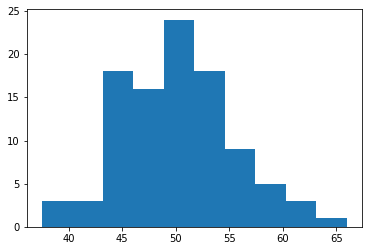

In [2]:
# Example 1
# ---
# A histogram can be used to test whether data is normally distributed. 
# This test simply consists of looking at the histogram and discerning 
# whether it approximates the bell curve of a normal distribution.
# ---
#

# generate univariate observations
data = 5 * randn(100) + 50

# histogram plot
pyplot.hist(data)
pyplot.show()

# From the resulting histogram, we can see a Gaussian-like shape to the data, 
# that although is not strongly the familiar bell-shape, is a rough approximation.

In [3]:
data

array([55.46355567, 45.95495467, 54.73629125, 52.79335314, 54.86223293,
       51.71090904, 44.50416052, 50.97555134, 49.8741464 , 53.12700596,
       48.1482628 , 56.83094665, 57.65388835, 43.73463137, 43.36653715,
       53.02252117, 45.47284441, 51.66733148, 46.32588027, 53.36335561,
       52.45721212, 44.74278562, 45.252434  , 53.70578886, 51.31743688,
       48.87021463, 60.23892258, 47.07605351, 45.94638641, 54.47599257,
       37.51742449, 50.80251915, 49.6045108 , 48.31146636, 43.83939003,
       49.91808408, 52.0903649 , 53.4093326 , 47.56331   , 50.04348092,
       40.28042487, 49.9103428 , 52.25375714, 52.5925272 , 58.59556287,
       54.12975442, 52.47673606, 53.86405356, 45.12497472, 44.40218675,
       51.57618297, 50.03310097, 48.02215443, 49.27155819, 55.66761483,
       42.65812852, 50.49056716, 60.5436787 , 44.99164044, 58.12710112,
       57.2647906 , 48.50517204, 45.1343555 , 50.61524258, 43.57658186,
       50.54778999, 50.97173752, 62.86598264, 65.95931464, 44.64

### <font color="green">1.0 Challenges</font>

In [8]:
# Challenge 1
# ---
# Question: Determine whether the given data follows a normal distribution using the histogram plot
# ---
# Dataset url = http://bit.ly/GaussianDistributionDataset1
import pandas as pd
# 
df=pd.read_csv('http://bit.ly/GaussianDistributionDataset1', names=['column 1'])
df.head()

,column 1
0,116.665861
1,107.741260
2,92.701130
3,90.084331
4,94.824923


(array([  4.,  18.,  57., 133., 242., 274., 169.,  84.,  16.,   3.]),
 array([ 30.73127898,  44.27992748,  57.82857598,  71.37722448,
         84.92587298,  98.47452148, 112.02316998, 125.57181848,
        139.12046698, 152.66911548, 166.21776398]),
 <a list of 10 Patch objects>)

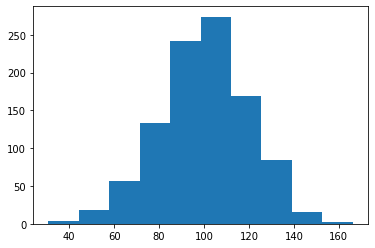

In [9]:
#visualize the histogram
pyplot.hist(df['column 1'])

In [10]:
# Challenge 2
# ---
# Question: Does the prices data follow a normal distribution? 
# If your sample follows a normal distribution, does this makes sense to you? Explain why.
# If your sample does not follow a normal distribution (e.g., it could be skewed left or right, 
# have a uniform distribution, or have some other shape), then why might this be the reason?
# ---
# Dataset url = http://bit.ly/NormalisationPricesDataset
# 
df_2=pd.read_csv('http://bit.ly/NormalisationPricesDataset')
df_2.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [11]:
#check for missing values
df_2['price'].isnull().sum()

0

(array([ 237., 1554., 1803., 1459.,  850.,  238.,   92.,   18.,    3.,
           5.]),
 array([ 949., 1394., 1839., 2284., 2729., 3174., 3619., 4064., 4509.,
        4954., 5399.]),
 <a list of 10 Patch objects>)

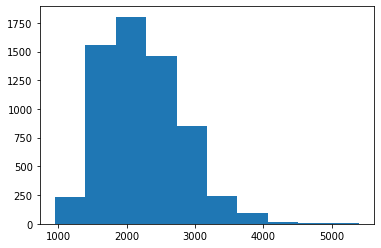

In [12]:
#visualize the histogram
pyplot.hist(df_2['price'])

## 2.0 Quantile-Quantile (Q-Q) Plot


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


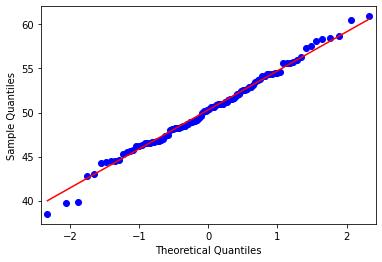

In [13]:
# Example 1
# ---
# The Q-Q plot generates its own sample of the idealized distribution that we are comparing with, 
# in this case the Gaussian distribution. The idealized samples are divided into groups (e.g. 5), called quantiles. 
# Each data point in the sample is paired with a similar member from the idealized distribution at the same cumulative distribution.
# The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis.
# A perfect match for the distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. 
# Often a line is drawn on the plot to help make this expectation clear. Deviations by the dots from the line 
# would show a deviation from the expected distribution.
# ---
#

# Importing libraries to plot our Q-Q plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(100) + 50

# q-q plot
qqplot(data, line='s')
pyplot.show()

# The resulting QQ plot shows the scatter plot of points in a diagonal line, 
# closely fitting the expected diagonal pattern for a sample from a Gaussian distribution.
# There are a few small deviations, especially at the bottom of the plot, 
# which is to be expected given the small data sample.

### <font color="green">2.0 Challenges</font>

In [15]:
# Challenge 1
# ---
# Question: Determine whether the given data follows a normal distribution using the Q-Q plot
# ---
# Dataset url = http://bit.ly/GaussianDistributionDataset2
# 
df_3=pd.read_csv('http://bit.ly/GaussianDistributionDataset2', names=['column 1'])
df_3.head()

,column 1
0,107.931822
1,69.449831
2,124.283718
3,100.110009
4,148.816515


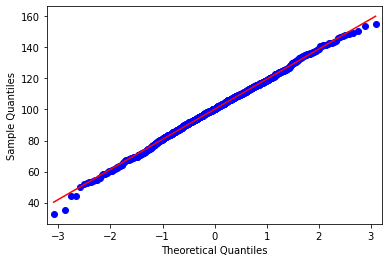

In [16]:
qqplot(df_3['column 1'], line='s')
pyplot.show()


In [17]:
# Challenge 2
# ---
# Question: Plot the win by wickets data in the given dataset and watch the curve.
# Does the data follow a normal distribution
# ---
# Dataset url = http://bit.ly/IndianPremierLeagueDataset
# 
df_4=pd.read_csv('http://bit.ly/IndianPremierLeagueDataset')
df_4.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


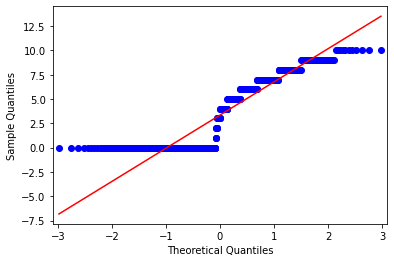

In [18]:
qqplot(df_4['win_by_wickets'], line='s')
pyplot.show()

## 3.0 The Shapiro-Wilk Test

In [19]:
# Example 1
# ---
# The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that 
# the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.
# In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, 
# although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.
# The shapiro() SciPy function will calculate the Shapiro-Wilk on a given dataset. 
# The function returns both the W-statistic calculated by the test and the p-value. 
# ---
#

# imporing the shapiro function
from scipy.stats import shapiro 

# generating univariate observations
data = 5 * randn(100) + 50

# testing for normality
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
  
# Running the example first calculates the test on the data sample, 
# then prints the statistic and calculated p-value. 
# The p-value is interested and finds that the data is likely drawn from a Gaussian distribution.

Statistics=0.989, p=0.572
Sample looks Gaussian


### <font color="green">3.0 Challenges</font>

In [24]:
# Challenge 1
# ---
# Question: Using The Shapiro-Wilk Test, determine whether the given data follows a normal distribution.
# ---
# Dataset url = http://bit.ly/GaussianDistributionDataset3
# 
df_5=pd.read_csv('normal3.txt', names=['col1'])
df_5.head()

,col1
0,82.294827
1,130.734276
2,59.993252
3,103.605770
4,129.715087


In [26]:
stat_1, p_1=shapiro(df_5['col1'])
print('Statistics=%.3f, p=%.3f' % (stat_1, p_1))

Statistics=0.999, p=0.558


In [27]:
#From the above the test is not significant and therefore the sample is likely to have been drawn from a normal distribution

In [28]:
# Challenge 2
# ---
# Question: Plot the win by runs data in the given dataset and watch the curve.
# Does the data follow a normal distribution
# ---
# Dataset url = http://bit.ly/IndianPremierLeagueDataset
# 
df_6=pd.read_csv('http://bit.ly/IndianPremierLeagueDataset')
df_6.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


(array([490.,  92.,  48.,  23.,  14.,  15.,   7.,   2.,   1.,   4.]),
 array([  0. ,  14.6,  29.2,  43.8,  58.4,  73. ,  87.6, 102.2, 116.8,
        131.4, 146. ]),
 <a list of 10 Patch objects>)

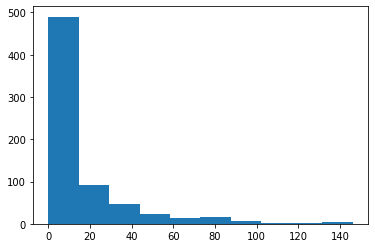

In [29]:
pyplot.hist(df_6['win_by_runs'])

## 4.0 Anderson-Darling Test


In [30]:
# Example 1
# ---
# Anderson-Darling Test is a statistical test that can be used to evaluate 
# whether a data sample comes from one of among many known data samples, named for Theodore Anderson and Donald Darling.
# It can be used to check whether a data sample is normal. 
# The test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the Kolmogorov-Smirnov test.
# A feature of the Anderson-Darling test is that it returns a list of critical values rather than a single p-value. 
# This can provide the basis for a more thorough interpretation of the result.
# The anderson() SciPy function implements the Anderson-Darling test. 
# It takes as parameters the data sample and the name of the distribution to test it against. 
# By default, the test will check against the Gaussian distribution (dist=’norm’).
# ---
# 

# Importing anderson function form scipy 
from scipy.stats import anderson

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(100) + 50

# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal' % (sl, cv))
    
# Running this example calculates the statistic on the test data set and prints the critical values.
# Critical values in a statistical test are a range of pre-defined significance boundaries at which 
# the H0 can be failed to be rejected if the calculated statistic is less than the critical value. 
# More on Critical values: http://bit.ly/CriticalValues.
# Rather than just a single p-value, the test returns a critical value for a range of different commonly used significance levels.
# We can interpret the results by failing to reject the null hypothesis that the data is normal 
# if the calculated test statistic is less than the critical value at a chosen significance level.
# We can see that at each significance level, the test has found that the data follows a normal distribution.

Statistic: 0.220
15.000: 0.555, data looks normal
10.000: 0.632, data looks normal
5.000: 0.759, data looks normal
2.500: 0.885, data looks normal
1.000: 1.053, data looks normal


### <font color="green">4.0 Challenges</font>

In [34]:
# Challenge 1 
# ---
# Question: Determine whether the given dataset follows a Gaussian Distribution
# ---
# Dataset url = http://bit.ly/GaussianDistributionDataset4
#
df_g=pd.read_csv('http://bit.ly/GaussianDistributionDataset4', names=['col1'])
result_2 = anderson(df_g['col1'])
result_2

AndersonResult(statistic=12.163441160710363, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [35]:
print('Statistic: %.3f' % result_2.statistic)
p = 0
for i in range(len(result_2.critical_values)):
	sl, cv = result_2.significance_level[i], result_2.critical_values[i]
	if result_2.statistic < result_2.critical_values[i]:
		print('%.3f: %.3f, data looks normal' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal' % (sl, cv))

Statistic: 12.163
15.000: 0.574, data does not look normal
10.000: 0.653, data does not look normal
5.000: 0.784, data does not look normal
2.500: 0.914, data does not look normal
1.000: 1.088, data does not look normal


In [36]:
# Challenge 2
# ---
# Question: Plot the win by runs data in the given dataset and watch the curve.
# Does the data follow a normal distribution
# ---
# Dataset url = http://bit.ly/IndianPremierLeagueDataset
# 
result_3=anderson(df_6['win_by_runs'])
print('Statistic: %.3f' % result_3.statistic)
p = 0
for i in range(len(result_3.critical_values)):
	sl, cv = result_3.significance_level[i], result_3.critical_values[i]
	if result_3.statistic < result_3.critical_values[i]:
		print('%.3f: %.3f, data looks normal' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal' % (sl, cv))

Statistic: 88.751
15.000: 0.573, data does not look normal
10.000: 0.652, data does not look normal
5.000: 0.783, data does not look normal
2.500: 0.913, data does not look normal
1.000: 1.086, data does not look normal


## 5.0 D’Agostino’s K^2 Test

In [38]:
# Example 1
# ---
# The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, 
# to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.
# -> Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.
# -> Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.
# The D’Agostino’s K^2 test is available via the normaltest() SciPy function and returns the test statistic and the p-value.
# ---

from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.102, p=0.950
Sample looks Gaussian


### <font color="green">5.0 Challenges</font>

In [39]:
# Challenge 1
# ---
# Question: Using D’Agostino’s K^2 Test, determine whether the given data follows a normal distribution.
# ---
# Dataset url = http://bit.ly/GaussianDistributionDataset3
# 
# normality test
stat, p = normaltest(df_5['col1'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.210, p=0.900
Sample looks Gaussian


In [40]:
# Challenge 2
# ---
# Question: From the fifa dataset given below, does the overall rating data follow a normal distribution? 
# If your sample follows a normal distribution, does this makes sense to you? Explain why.
# If your sample does not follow a normal distribution (e.g., it could be skewed left or right, 
# have a uniform distribution, or have some other shape), then why might this be the reason?
# ---
# Dataset url = http://bit.ly/FifaDataset
# 
df_fifa=pd.read_csv('http://bit.ly/FifaDataset')
df_fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [41]:
df_fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [42]:
stat, p = normaltest(df_fifa['Overall'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')


Statistics=20.219, p=0.000
Sample does not look Gaussian


## 6.0 Further Readings

Other plots that we have not covered in this session but are also worth exploring include:


*   Box Plots.
*   The Kolmogorov-Smirnov test.


